# Homework 2

Class: ME2060
\
Author: Jacob Cunningham
\
Date: February 16, 2025

## Problem 1: Analysis of Runge's phenomenon and Chebyshev nodes

Consider the follow four functions on the interval $I = [-1, 1]$:

$$
\begin{equation*}
  f_1(x) = \frac{1}{1 + 10 x^2}, 
  \quad f_2(x) = \frac{1}{1 + 3 x^2},
  \quad f_3(x) = \cos(x),
  \quad f_4(x) = e^x
\end{equation*}
$$

### Part A

For each of the above functions, calculate an approximation via interpolation with Lagrange polynomials on 21 equidistant nodes within $[-1, 1]$ and plot it along with the exact function. Create a separate plot for each function. Label your plots with different colors and line styles. You may reuse the notebook "Week3.Lagrange" available on Canvas. Using your plots which of the Lagrange approximations to a function is more susceptible to Runge's phenomenon of overshooting?

In [1]:
# Create the equidistant points over the interval
I_start, I_end = -1, 1
pts = 21 # requested number of points
x_nodes = LinRange(I_start, I_end, pts)

# Define the four functions
f1(x) = 1 / (1 + 10 * x^2)
f2(x) = 1 / (1 + 3 * x^2)
f3(x) = cos(x)
f4(x) = exp(x);

Lagrange interpolation is written as:

$$
\begin{equation*}
  P(x) = \sum_{i=1}^{n} y_i \ell_i (x),
\end{equation*}
$$

where $\ell_i (x)$ are the Lagrange basis polynomials defined as:

$$
\begin{equation*}
  \ell_i(x) = \prod_{\substack{j=1 \\ j \neq i}}^{n} \frac{x - x_j}{x_i - x_j}
\end{equation*}
$$

In [2]:
# define function for Lagrange interpolation
function lagrange_interpolant(x_nodes, y_nodes, x_interp)
    n = length(x_nodes)
    P = zeros(length(x_interp)) # initializes the ouput with 0s

    for i in range(1, n)
        ℓ_i = ones(length(x_interp)) # initializes basis polynomial

        for j in range(1, n)
            if i != j
                ℓ_i .*= (x_interp .- x_nodes[j]) / (x_nodes[i] - x_nodes[j])
            end
        end
        P .+= y_nodes[i] .* ℓ_i
    end
    return P
end;

#### Function 1

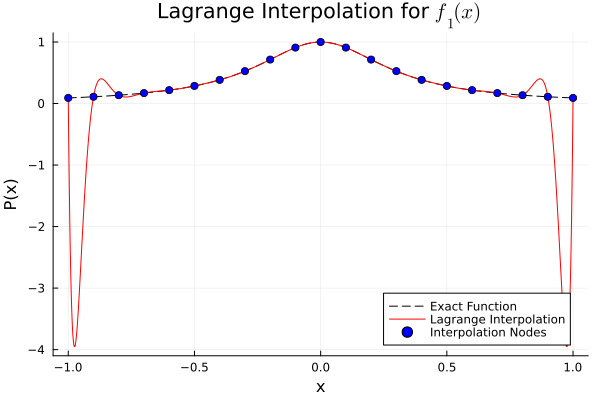

In [18]:
import Plots as plt
import LaTeXStrings as ltx

# helper function for plotting
function lag_plot(I_start, I_end, x_nodes, f, title, density=1000)
    # Fine grid for evaluating P(x)
    x_dense = LinRange(I_start, I_end, density)

    # Value at nodes
    y_nodes = f.(x_nodes)

    # Calculate the interpolated function
    y_interp = lagrange_interpolant(x_nodes, y_nodes, x_dense);

    # Plot results
    plt.plot(x_dense, f.(x_dense), label="Exact Function", linestyle=:dash, color=:black)
    plt.plot!(x_dense, y_interp, label="Lagrange Interpolation", color=:red)
    plt.scatter!(x_nodes, y_nodes, label="Interpolation Nodes", color=:blue)

    plt.title!("Lagrange Interpolation for " * title)
    plt.xlabel!("x")
    plt.ylabel!("P(x)")
end

# Show f1
lag_plot(I_start, I_end, x_nodes, f1, ltx.L"f_1 (x)")

#### Function 2

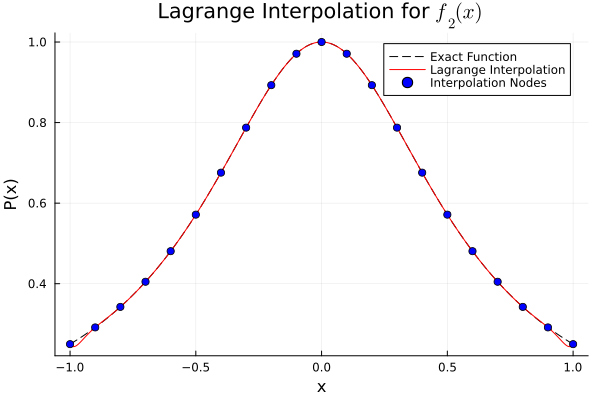

In [19]:
# Show f2
lag_plot(I_start, I_end, x_nodes, f2, ltx.L"f_2 (x)")

#### Function 3

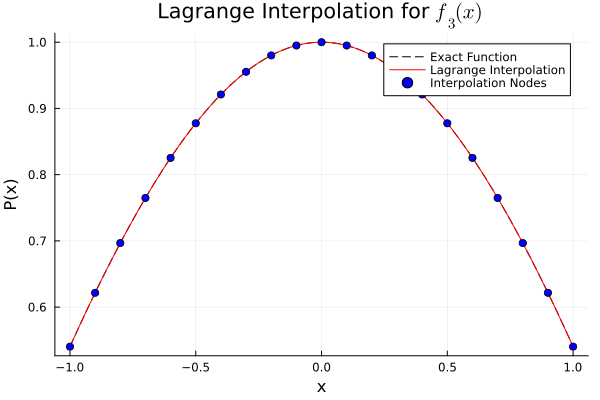

In [20]:
# Show f3
lag_plot(I_start, I_end, x_nodes, f3, ltx.L"f_3 (x)")

#### Function 4

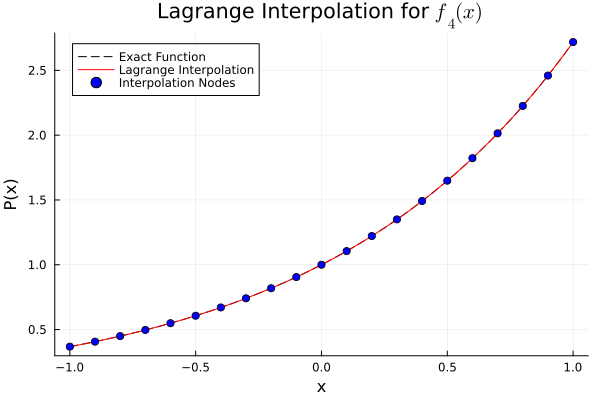

In [34]:
# Show f4
lag_plot(I_start, I_end, x_nodes, f4, ltx.L"f_4 (x)")

Runge's phenomenom of overshooting is observed in $f_1 (x)$ and $f_2 (x)$. This is due to the large slopes for those functions at $\pm$ 1.

### Part B

For the function $f_1 (x)$, calculate an approximation via interpolation with Lagrange polynomials as well as Chebyshev polynomials using 6 Chebyshev points within $[-1, 1]$, and plot both approximations along with the exact function on the same graph. Note that the Lagrange polynomials must use the same points as the Chebyshev polynomials. You may reuse any appropriate weekly notebooks available on Canvas. How do the approximations with Lagrange and Chebyshev polynomials compare to each other? Consider the accuracy of Lagrange interpolation from Part A and the current Lagrange interpolation with using 6 Chebyshev nodes, which on is better? Explain your observations based on function approximation theory.

Chebyshev nodes are given by:

$$
\begin{equation*}
  x_i = \cos \bigg ( \frac{(2 i + 1) \pi}{2 (n + 1)} \bigg ),
  \quad
  i = 0,\; 1,\; \ldots,\; n
\end{equation*}
$$

In [41]:
# Define function for chebyshev_nodes
function chebyshev_nodes(n, I_start, I_end)
    c_nodes = Float64[] # initialize list
    for i in range(0, n)
        x_i = cos(((2 * i + 1) * π) / (2 * (n + 1)))
        ans = (I_start + I_end) / 2 + ((I_end - I_start) / 2) * x_i
        push!(c_nodes, ans)
    end
    return c_nodes
end

# Calculate Chebyshev nodes
xc_nodes = chebyshev_nodes(6, I_start, I_end)

7-element Vector{Float64}:
  0.9749279121818236
  0.7818314824680298
  0.4338837391175582
  6.123233995736766e-17
 -0.43388373911755806
 -0.7818314824680295
 -0.9749279121818237

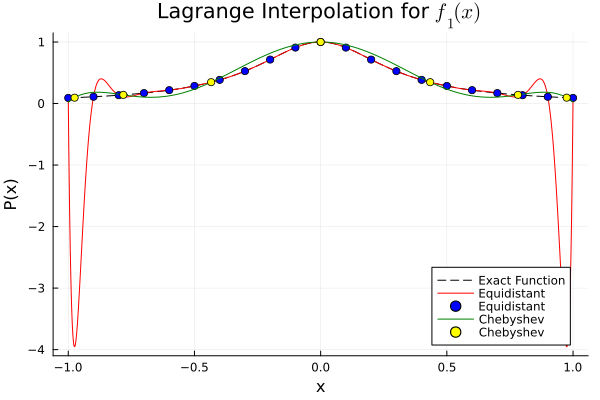

In [42]:
# helper function for plotting
function clag_plot(I_start, I_end, x_nodes, xc_nodes, f, title, density=1000)
    # Fine grid for evaluating P(x)
    x_dense = LinRange(I_start, I_end, density)

    # Value at nodes
    y_nodes = f.(x_nodes)

    # Value at Chebyshev nodes
    yc_nodes = f.(xc_nodes)

    # Calculate the interpolated function (Lagrange)
    y_interp = lagrange_interpolant(x_nodes, y_nodes, x_dense)

    # Calculate the interpolated function (Chebyshev)
    y_chebyshev = lagrange_interpolant(xc_nodes, yc_nodes, x_dense)

    # Plot results
    plt.plot(x_dense, f.(x_dense), label="Exact Function", linestyle=:dash, color=:black)
    plt.plot!(x_dense, y_interp, label="Equidistant", color=:red)
    plt.scatter!(x_nodes, y_nodes, label="Equidistant", color=:blue)
    plt.plot!(x_dense, y_chebyshev, label="Chebyshev", color=:green)
    plt.scatter!(xc_nodes, yc_nodes, label="Chebyshev", color=:yellow)

    plt.title!("Lagrange Interpolation for " * title)
    plt.xlabel!("x")
    plt.ylabel!("P(x)")
end;

# Show f1
clag_plot(I_start, I_end, x_nodes, xc_nodes, f1, ltx.L"f_1 (x)")

The Chebyshev-based Lagrange interpolation provides better approximation than the equidistant-based Lagrange interpolation. Chebyshev nodes minimize the interpolation error by clustering more points near the edges where polynomial interpolation is typically unstable.

### Part C

For functions $f_1 (x)$ and $f_3 (x)$ given in Part A, derive the 1st, 2nd, and 3rd derivatives analytically (or use symbolic math software) and plot them in the interval $[-1, 1]$. Now, pick the point $x = -0.9$. What is the trend of derivatives for each function at this point, with increasing order of differentiaion? Do the values stay constant, increasing, or decreasing trend? Use this information to explain what you observed in Part A.

**Solve the derivatives analytically**

In [58]:
import Symbolics as sym

# define variables and equation
sym.@variables x
f1_sym = 1 / (1 + 10 * x^2)
f3_sym = cos(x)

# Symbollicaly solve for f'
df1_1 = sym.derivative(f1_sym, x)
print("First derivative of f1(x):")
display(df1_1)

df3_1 = sym.derivative(f3_sym, x)
print("First derivative of f3(x):")
display(df3_1)

# Symbollically solve for f''
df1_2 = sym.derivative(df1_1, x)
print("Second derivative of f1(x):")
display(df1_2)

df3_2 = sym.derivative(df3_1, x)
print("First derivative of f3(x):")
display(df3_2)

# Symbollically solve for f'''
df1_3 = sym.derivative(df1_2, x)
print("Third derivative of f1(x):")
display(df1_3)

df3_3 = sym.derivative(df3_2, x)
print("First derivative of f3(x):")
display(df3_3)

First derivative of f1(x):

-20x*(1 / ((1 + 10(x^2))^2))

First derivative of f3(x):

-sin(x)

Second derivative of f1(x):

-20 / ((1 + 10(x^2))^2) + 800(1 + 10(x^2))*(x^2)*(1 / ((1 + 10(x^2))^4))

First derivative of f3(x):

-cos(x)

Third derivative of f1(x):

(1600x) / ((1 + 10(x^2))^3) + (16000(x^3)) / ((1 + 10(x^2))^4) - 40x*(1 + 10(x^2))*(-20 / ((1 + 10(x^2))^4)) - 64000(x^3)*((1 + 10(x^2))^4)*(1 / ((1 + 10(x^2))^8))

First derivative of f3(x):

sin(x)

**Plot the functions**

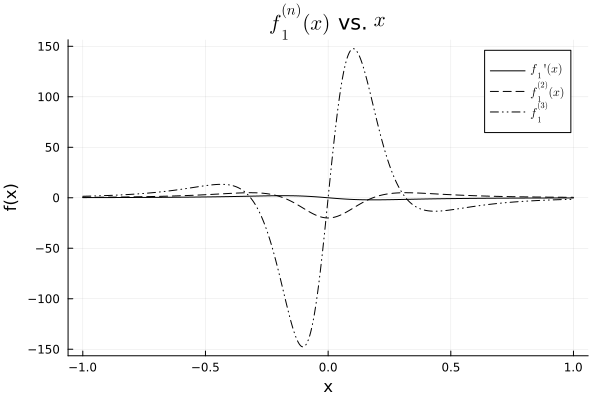

In [93]:
x = LinRange(I_start, I_end, 1000)

# f1 derivatives
f1_1(x) = -20x*(1 / ((1 + 10(x^2))^2))
f1_2(x) = -20 / ((1 + 10(x^2))^2) + 800(1 + 10(x^2))*(x^2)*(1 / ((1 + 10(x^2))^4))
f1_3(x) = (1600x) / ((1 + 10(x^2))^3) + (16000(x^3)) / ((1 + 10(x^2))^4) - 40x*(1 + 10(x^2))*(-20 / ((1 + 10(x^2))^4)) - 64000(x^3)*((1 + 10(x^2))^4)*(1 / ((1 + 10(x^2))^8))

# Plot the results
plt.plot(x, f1_1.(x), label=ltx.L"f_{1}'(x)", linestyle=:solid, color=:black)
plt.plot!(x, f1_2.(x), label=ltx.L"f_{1}^{(2)}(x)", linestyle=:dash, color=:black)
plt.plot!(x, f1_3.(x), label=ltx.L"f_{1}^{(3)}", linestyle=:dashdotdot, color=:black)

plt.title!(ltx.L"$f_{1}^{(n)}(x)$ vs. $x$")
plt.xlabel!("x")
plt.ylabel!("f(x)")

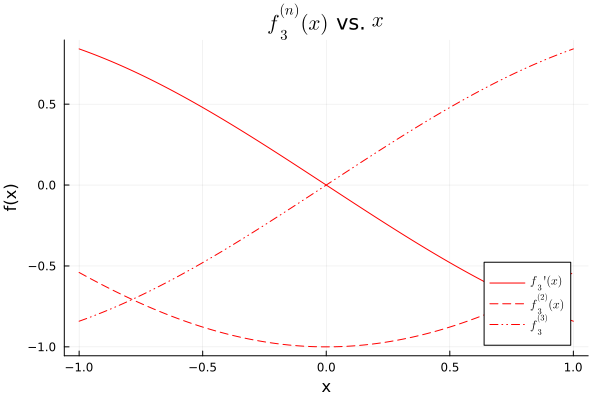

In [94]:
# f3 derivatives
f3_1(x) = -sin(x)
f3_2(x) = -cos(x)
f3_3(x) = sin(x)

# Plot results
plt.plot(x, f3_1.(x), label=ltx.L"f_{3}'(x)", linestyle=:solid, color=:red)
plt.plot!(x, f3_2.(x), label=ltx.L"f_{3}^{(2)}(x)", linestyle=:dash, color=:red)
plt.plot!(x, f3_3.(x), label=ltx.L"f_{3}^{(3)}", linestyle=:dashdotdot, color=:red)

plt.title!(ltx.L"$f_{3}^{(n)}(x)$ vs. $x$")
plt.xlabel!("x")
plt.ylabel!("f(x)")

For $f_1 (x)$ the derivatives oscillate with alternating increases and decreases. The higher-order derivatives grow rapidly in magnitude which is why polynomial interpolation struggles leading to the Runge's phenomenom seen in Part A.

For $f_3 (x)$ the derivative decrease in magnitude in a predictable pattern which explains why this did not suffer from Runge's phenomenon in Part A.

### Part D

Now for $x = 0.9$, calculate the expressions

$$
\begin{equation*}
  P_L (n) = \prod_{i = 0}^{n} (x - x_{i}^{L}),
  \quad
  P_C (n) = \prod_{i = 0}^{n} (x - x_{i}^{C})
\end{equation*}
$$

for $n = 4,\; 7,\; 10$, where $x_{i}^{L},\; i = 0,\; 1,\;, \ldots,\; n$ are the $n + 1$ equidistant Lagrange points and $x_{i}^{C},\; i = 0,\; 1,\; \ldots,\; n$ are the Chebyshev points between $[-1, 1]$. Plot $P_L (n)$, $P_C (n)$ as a function of $n$ running from 4, 7, 10 in the same plot. How do they compare to each other? Based on equation (2), can you explain why the interpolation on Chebyshev nodes is more accurate than interpolation on equidistant points?

In [88]:
# Evaluation point
x = 0.9

# points
ns = [4, 7, 10]

# P_L and P_C values (init)
P_L_values = []
P_C_values = []

# helper to compute product term
function P_n(x, nodes)
    return prod(x - xi for xi in nodes)
end
    
for n in ns
    x_L = LinRange(I_start, I_end, n + 1)
    x_C = chebyshev_nodes(n + 1, I_start, I_end)
    push!(P_L_values, abs(P_n(x, x_L))) # abs because I plan to use log plot
    push!(P_C_values, abs(P_n(x, x_C)))
end

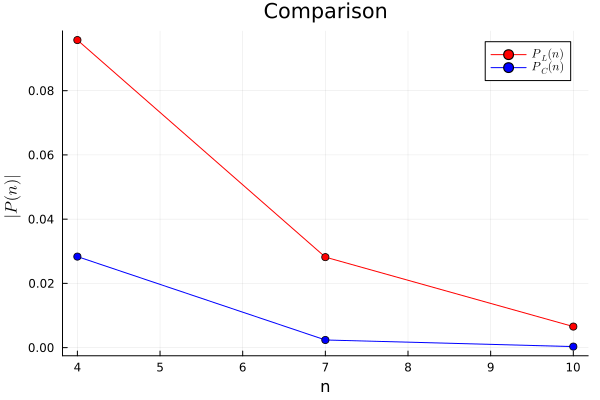

In [89]:
plt.plot(ns, P_L_values, marker=:circle, label=ltx.L"P_{L}(n)", color=:red)
plt.plot!(ns, P_C_values, marker=:circle, label=ltx.L"P_{C}(n)", color=:blue)
plt.xlabel!("n")
plt.ylabel!(ltx.L"|P(n)|")
plt.title!("Comparison")

The plot shows that $P_L (n)$ remains significantly larger than $P_C (n)$, confirming that interpolation using equidistant points results in larger errors. Equation (2) explains this behavior: the interpolation error is proportional to $P(n)$, which grows rapidly for equidistant nodes but remains well-controlled for Chebyshev nodes. This is why Chebyshev interpolation is more accurate and avoids Runge’s phenomenon.

## Problem 2: Analysis of B-Spline convergence with increasing order and knot number (Continuation of in-class exercise)

Let the following two function be defined on the interval $I = [-3, 3]$:

$$
\begin{equation*}
  f_1 (x) = \sin(x), \quad f_2 (x) = \cos(x^2)
\end{equation*}
$$

In the following, knots will be referring to points within the interval $I$ on which the exact function values are known and are used for B-Spline Interpolation of the functions given above.

### Part A

Use three equidistant knots within $I = [-3, 3]$ (with distance $d = 3$) to construct the B-Spline interpolated approximation for the function $f_1 (x) = \sin(x)$, with increasing B-Spline order $n = 2,3,4,5,6,7,8$. For each B-Spline order (i.e., $n = 2,3,\; \ldots,8$), evaluate the exact function and the B-Spline approximation to that exact function on an equidistant grid for $[-3, 3]$ with 1001 points ($x_0 = -3, \ldots, x_i, \ldots, x_{1000} = 3$). Calculate the maximal approximation error as $\mathrm{max}(|f_e (x_i) - F_B (x_i)|),\; i = 0, \ldots, 1000$, where $f_e$ is the exact function and $F_B$ is the B-Spline approximation of the exact function. Then plot the error $\epsilon (n)$ as a function of order $n$. In a seprate figure, plot the B-Spline approximations with order $n = 2, 3, 4, 5$ along with the exact function $f_1 (x)$ to visualize the quality of the interpolated approximations with increasing B-Spline order. Comment on your observations.

In [130]:
import BSplineKit as bsk

# Define the function
f1(x) = sin(x)

# Define the interval and domain
I_start, I_end = -3, 3
x_eval = collect(LinRange(I_start, I_end, 1001))  # Convert LinRange to Vector

# B-Spline orders
orders = 2:8

# Store max errors
max_errors = Float64[]

# Calculate each B-Spline Order
for n in orders
    num_knots = n + 1  # Ensure enough knots for order n
    knots = collect(LinRange(I_start, I_end, num_knots))  # Convert to vector

    # Interpolate B-Spline (Fixed Error)
    spline = bsk.interpolate(knots, f1.(knots), bsk.BSplineOrder(n), Nothing)  # Fixes BC issue

    # Evaluate B-Spline approximation (Fixed Error)
    spline_approx = spline.(x_eval)  # Now correctly evaluates the spline

    # Compute max error
    max_error = maximum(abs.(f1.(x_eval) - spline_approx))
    push!(max_errors, max_error)
end

# Display max errors
display(max_errors)


LoadError: MethodError: no method matching interpolate(::Vector{Float64}, ::Vector{Float64}, ::BSplineKit.BSplines.BSplineOrder{2}, ::Type{Nothing})

[0mClosest candidates are:
[0m  interpolate(::AbstractVector, ::AbstractVector, ::BSplineKit.BSplines.BSplineOrder, [91m::BSplineKit.BoundaryConditions.Periodic[39m)
[0m[90m   @[39m [35mBSplineKit[39m [90mC:\Users\jjcun\.julia\packages\BSplineKit\Sxz1p\src\SplineInterpolations\[39m[90m[4mSplineInterpolations.jl:286[24m[39m
[0m  interpolate(::AbstractVector, ::AbstractVector, ::BSplineKit.BSplines.BSplineOrder, [91m::BSplineKit.BoundaryConditions.Natural[39m)
[0m[90m   @[39m [35mBSplineKit[39m [90mC:\Users\jjcun\.julia\packages\BSplineKit\Sxz1p\src\SplineInterpolations\[39m[90m[4mSplineInterpolations.jl:274[24m[39m
[0m  interpolate(::AbstractVector, ::AbstractVector, ::BSplineKit.BSplines.BSplineOrder, [91m::Nothing[39m)
[0m[90m   @[39m [35mBSplineKit[39m [90mC:\Users\jjcun\.julia\packages\BSplineKit\Sxz1p\src\SplineInterpolations\[39m[90m[4mSplineInterpolations.jl:259[24m[39m
[0m  ...


In [ ]:
# Plot exact function
plt.plot(x, f1.(x), label="Exact", linetyle=:dash, color=:black)